[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) gender

b) temperature

c) number of classes taken

d) height

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

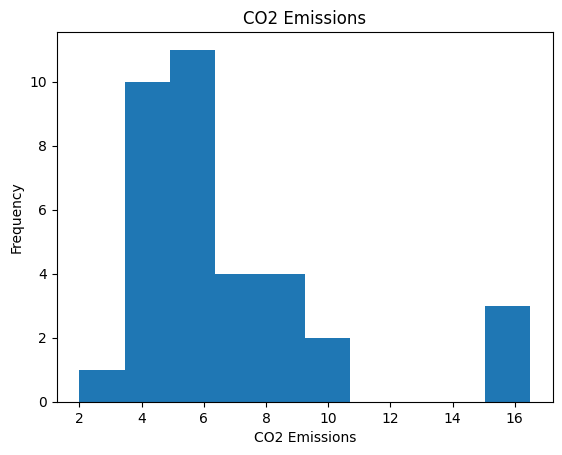

In [3]:
plt.hist(carbon_west["CO2"])
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.title("CO2 Emissions")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [33]:
carbon_mean = carbon_west["CO2"].mean()
carbon_median = carbon_west["CO2"].median()
carbon_std = carbon_west["CO2"].std()

print("mean", carbon_mean)
print("median", carbon_median)
print("std", carbon_std)

mean 6.717142857142858
median 5.9
std 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [34]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [36]:
murders_without_dc = murders[murders["state"] != "DC"]

mean_murders = murders_without_dc["murder"].mean()
median_murders = murders_without_dc["murder"].median()
std_murders = murders_without_dc["murder"].std()

print("mean ", mean_murders)
print("median ", median_murders)
print("std ", std_murders)

mean  4.874
median  4.85
std  2.586291174793806


Part b. Find the five-number  summary without D.C.

In [37]:
murders_without_dc.describe()

,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [38]:
murders_median = murders["murder"].median()
murders_info = murders["murder"].describe()

print("median", murders_median)
print(murders_info)

median 5.0
count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64


The mean is affected more by the outlier. While the difference between the medians is around 0.2, the difference in the means is closer to 0.4. When it comes to the range or interquartile range, the interquartile range for both is very similar. While the range is very different. A difference of about 10. This makes sense if there is an outlier for it to affect the range greatly while the interquartile range stays similar.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [17]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

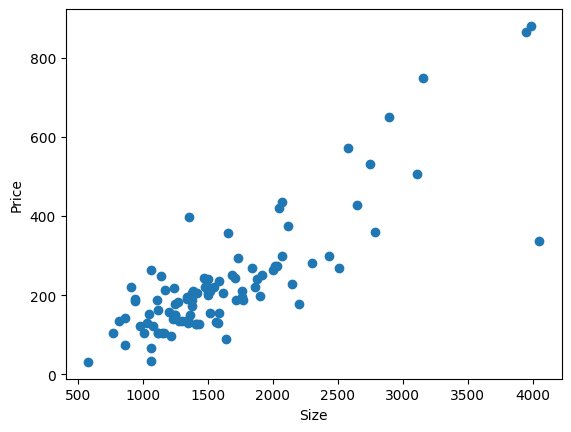

In [39]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

Part b. Find the correlation between the two variables.

In [40]:
correlation = houses['size'].corr(houses['price'])
print("Correlation: ", correlation)

Correlation:  0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

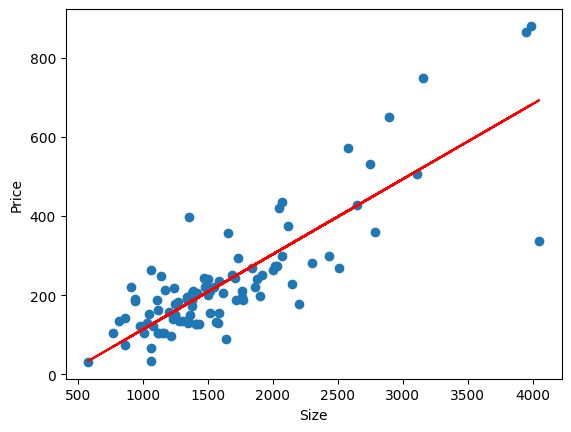

In [41]:
x = houses['size'].values.reshape(-1, 1)
y = houses['price'].values

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(houses['size'], houses['price'])
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

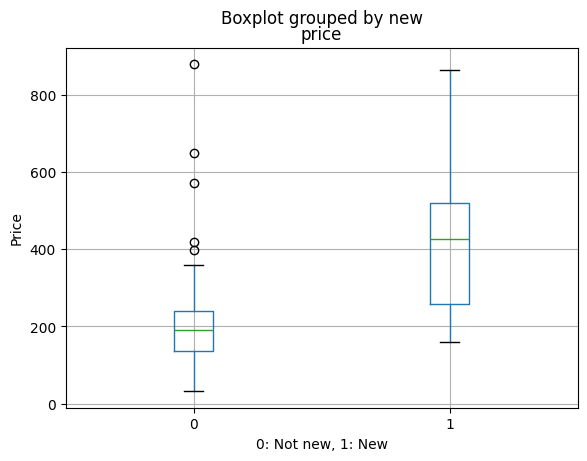

In [42]:
houses.boxplot(column='price', by='new')
plt.xlabel("0: Not new, 1: New")
plt.ylabel("Price")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As we can see from the line of regression and the scatter plot, there is a strong positive relationship between size and price of a house. The line of regression is in an upward slope and the dots of the plot are clustered pretty closesly to the line.  This menas we can understand that the bigger a house is the more it will cost on average.

Regarding the realtionship between price and whether or not a house is new, I can see from the boxplot that there is some overlap between the two. On average the new houses cost more and there is a much larger range for the new houses. The median for new houses is almost 200,000 more than old houses. According to the plot, new houses cost more and also have a larger range of prices than old houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [31]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat",sep=r'\s+')

In [32]:
contigencey_table = pd.crosstab(happy['marital'], happy['happiness'])
print(contigencey_table)

happiness    1    2    3
marital                 
1          432  504   61
2           92  282  103
3          124  409  135
